## TASK 4- Sales Prediction using Python

#### The goal of this task is to develop a model that accurately predict future sales using machine learning techniques, helping businesses optimize advertising strategies and maximize sales potential.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

### Load dataset

In [68]:
#Create a dataframe
df = pd.read_csv("C:/Users/theja/Documents/Online_courses/A_Codsoft/Sales Prediction using Python/advertising.csv", encoding='ISO-8859-1')

In [69]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [70]:
df.shape

(200, 4)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Data cleaning

In [72]:
#Checking null values
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [73]:
# Checking duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [74]:
df.duplicated().sum()

np.int64(0)

##### * No missing values or duplicated values in the dataset

<Axes: >

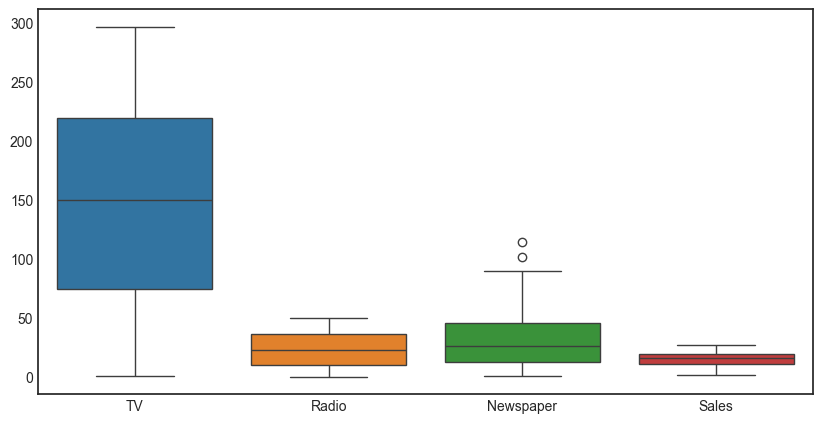

In [75]:
# Outlier Detection
fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(data=df, ax=ax)

##### * No considerable outliers in the data.

## Exploratory Data Analysis (EDA)

### Descriptive Data Analysis

In [76]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Univariate Analysis

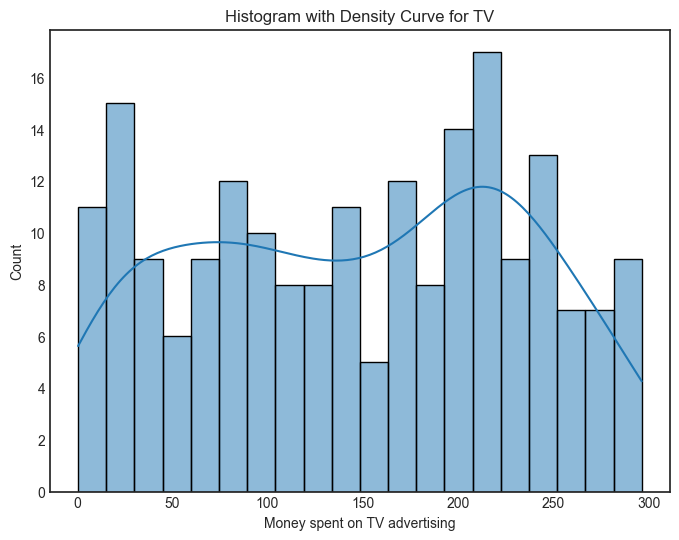

In [93]:
#Histogram with Density curve for TV Advertising
fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(df['TV'],bins=20, kde=True)
ax.set_xlabel('Money spent on TV advertising')
ax.set_title('Histogram with Density Curve for TV')
plt.show()

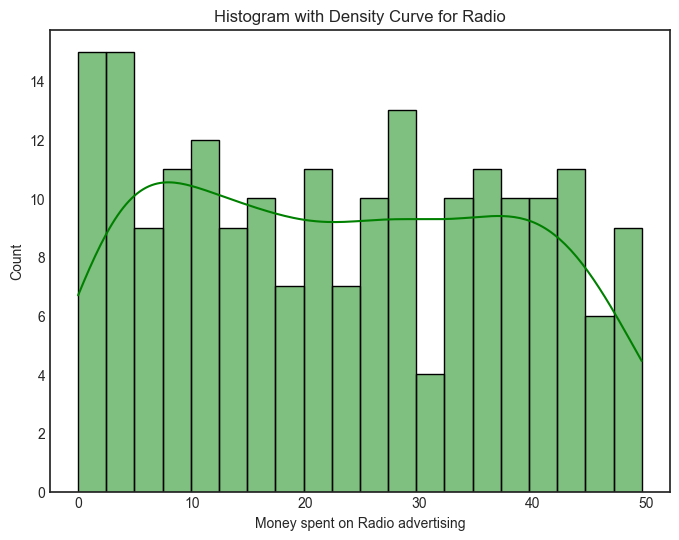

In [94]:
#Histogram with Density curve for Radio Advertising
fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(df['Radio'],bins=20,color='green', kde=True)
ax.set_xlabel('Money spent on Radio advertising')
ax.set_title('Histogram with Density Curve for Radio')
plt.show()

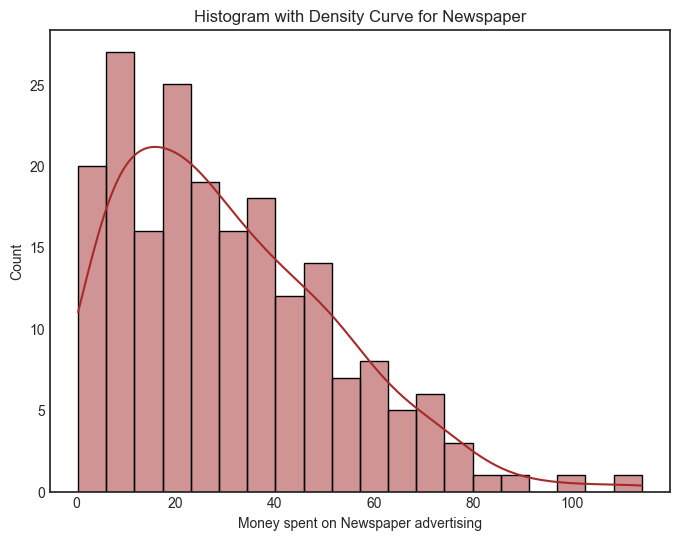

In [95]:
#Histogram with Density curve for Newspaper Advertising
fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(df['Newspaper'],bins=20,color='brown', kde=True)
ax.set_xlabel('Money spent on Newspaper advertising')
ax.set_title('Histogram with Density Curve for Newspaper')
plt.show()

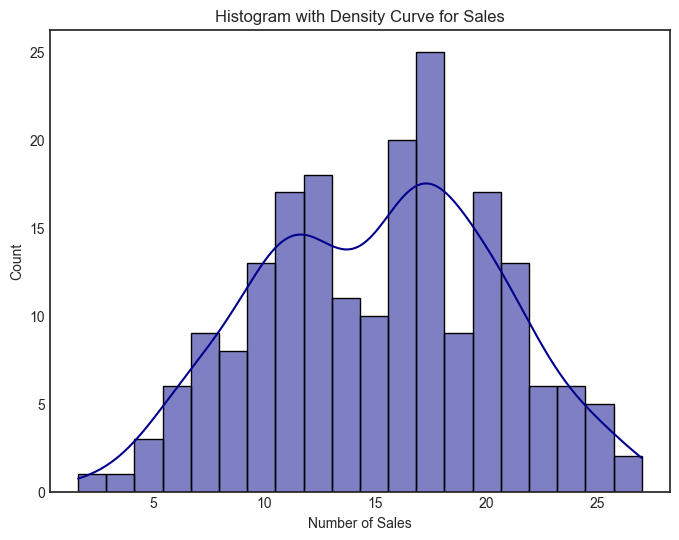

In [92]:
#Histogram with Density curve for Sales Advertising
fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(df['Sales'],bins=20,color='darkblue', kde=True)
ax.set_xlabel('Number of Sales')
ax.set_title('Histogram with Density Curve for Sales')
plt.show()

### Correlation Analysis

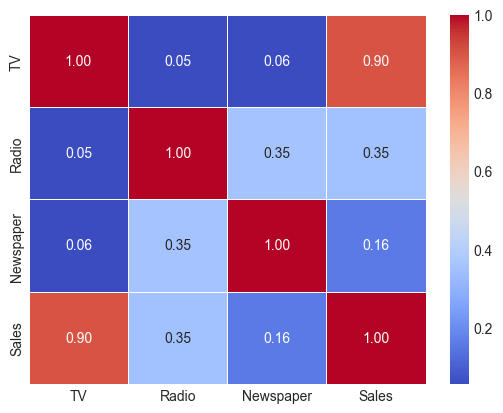

In [118]:
# Checking relationship between variables
fig,ax=plt.subplots()
sns.heatmap(df.corr(), annot=True,cmap='coolwarm',fmt=".2f",ax=ax,linewidth=0.5)
plt.show()

##### * This shows relationship of Sales against TV advertising is highly positive correlated. Sales against Radio advertising has moderately positive relationship and against Newspaper advertising has positively low relationship.

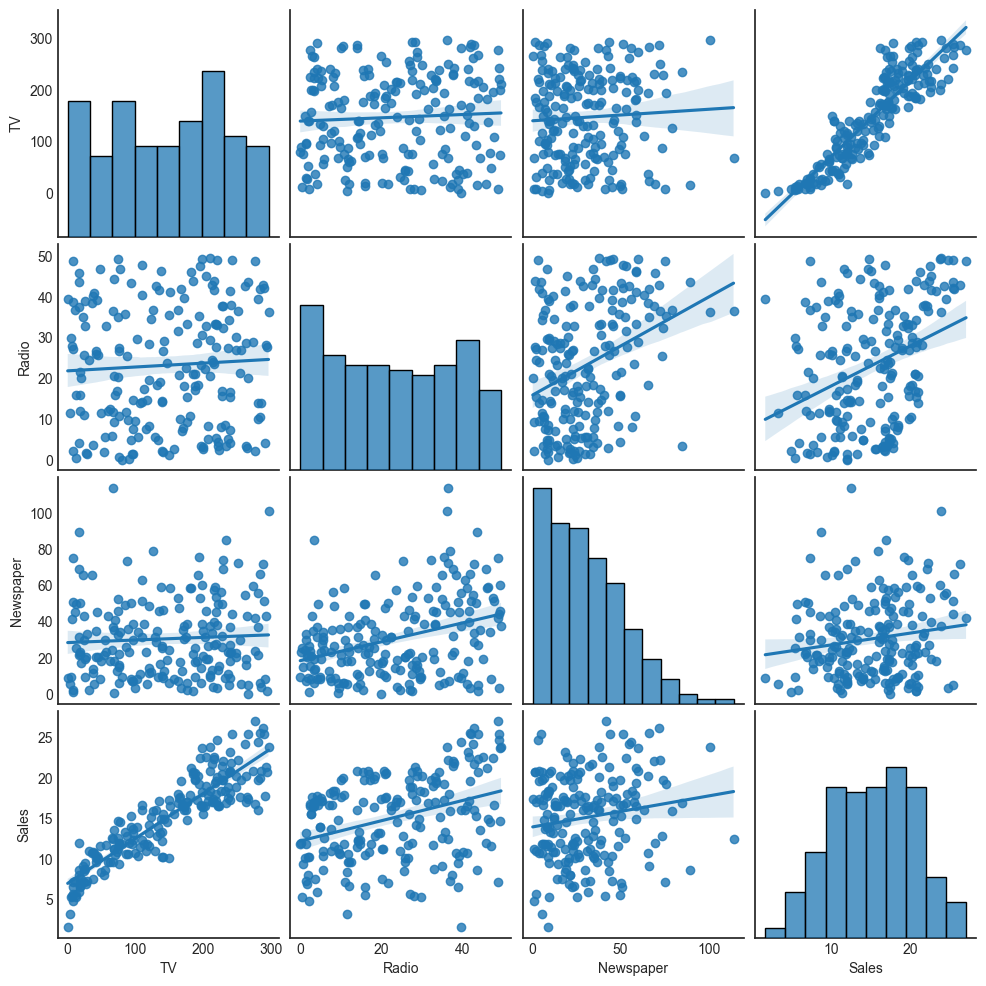

In [116]:
#Correlogram
sns.pairplot(df, kind='reg')

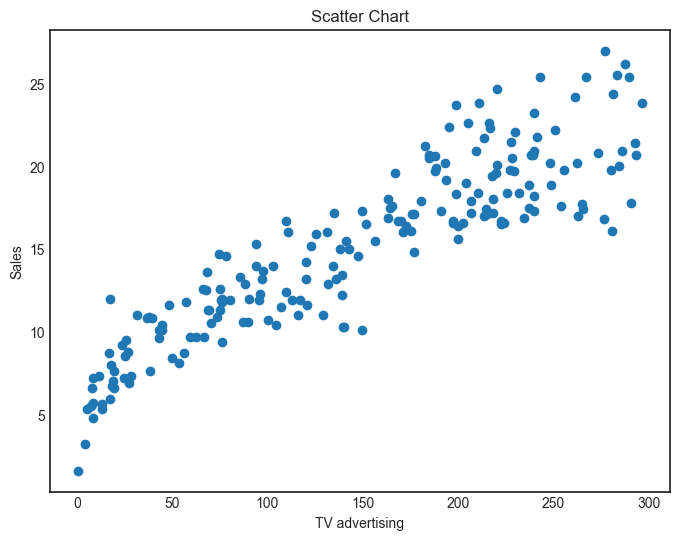

In [152]:
#Relationship of Sales against TV Advertising
fig,ax=plt.subplots(figsize=(8,6))
ax.scatter(x='TV',y='Sales',data=df,marker='o')
ax.set_xlabel('TV advertising')
ax.set_ylabel('Sales')
ax.set_title("Scatter Chart")
plt.show()

##### * This scatter plot shows the realtionship between Sales and TV advertising is highly positive correlated.

### Multicollinearity Analysis

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF for Sales against each features
df_vif = df.drop('Sales', axis=1)
df_vif = df_vif.apply(pd.to_numeric, errors= 'coerce')

vif_data= pd.DataFrame()
vif_data["Feature"] = df_vif.columns
vif_data["VIF"] =[variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]
print(vif_data)


     Feature       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


##### * There are no considerable multicollinearity effect. All the VIF values are less than 10.

## Data Splitting

In [122]:
from sklearn.model_selection import train_test_split

# Define feature and target variables
x= df[['TV', 'Radio','Newspaper']]
y=df['Sales']

#Split dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

train_data= x_train.join(y_train)
train_data

,TV,Radio,Newspaper,Sales
153,171.3,39.7,37.7,16.0
9,199.8,2.6,21.2,15.6
12,23.8,35.1,65.9,9.2
172,19.6,20.1,17.0,7.6
181,218.5,5.4,27.4,17.2
...,...,...,...,...
45,175.1,22.5,31.5,16.1
145,140.3,1.9,9.0,10.3
100,222.4,4.3,49.8,16.7
14,204.1,32.9,46.0,19.0


## Model Selection - Linear Regression Model

### Model Building

In [123]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data[['TV', 'Radio','Newspaper']], train_data['Sales']

#Build a Linear Regression model
fitted_model = LinearRegression()
#Train the model
fitted_model.fit(x_train,y_train)
#Make predictions
y_pred = fitted_model.predict(x_test)

### Model Evaluation

In [124]:
# Evaluating the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE =  mean_squared_error(y_test, y_pred) 
MAE = mean_absolute_error(y_test, y_pred)
R2_Score = r2_score(y_test, y_pred)

print('Mean squared error value is: ', MSE)
print('Mean absolute error value is: ', MAE)
print('R2 score value is: ', R2_Score)

Mean squared error value is:  2.4603154488934664
Mean absolute error value is:  1.2207487898057696
R2 score value is:  0.9001515614986113


##### * The coefficient of the determination or the R2 score value of fitted linear regression model is 0.9 which means about 90% of the variance in the target variable(Sales) is strongly explained by the model. Also, the mean squared error value or the difference between actual and predicted value is 2.46 and the mean absolute error values is 1.22 which are not considerably high. So, we can accept this fitted model for predict future sales based on the money spent on different platforms for marketing.

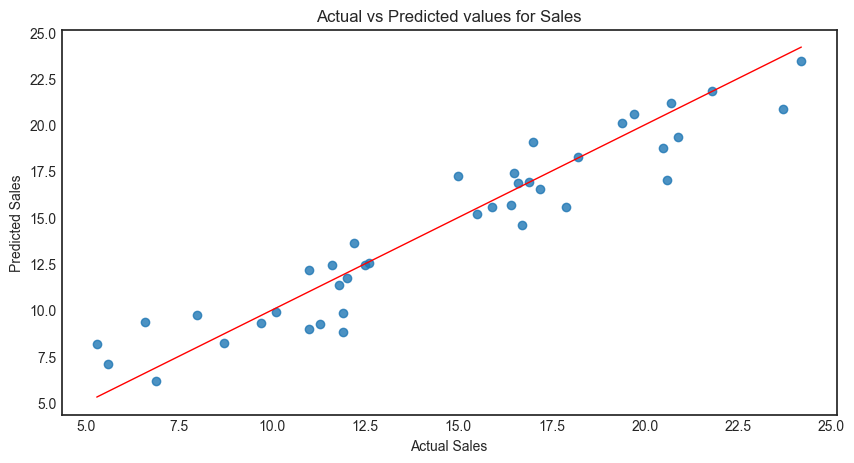

In [154]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred,alpha=0.8)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',linewidth=1)
plt.title('Actual vs Predicted values for Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

### Model Testing

In [136]:
x.tail(10)

,TV,Radio,Newspaper
190,39.5,41.1,5.8
191,75.5,10.8,6.0
192,17.2,4.1,31.6
193,166.8,42.0,3.6
194,149.7,35.6,6.0
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2
199,232.1,8.6,8.7


In [137]:
y.tail(10)

190    10.8
191    11.9
192     5.9
193    19.6
194    17.3
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, dtype: float64

In [138]:
# Create new trial dataframe to testing

data = {'TV': [100], 'Radio': [20] ,'Newspaper': [10]}
trial_data = pd.DataFrame(data)

In [139]:
# Predict rating using trial data
predict_rating = fitted_model.predict(trial_data)
print('Predicted Rating for trial data: ',predict_rating[0])

Predicted Rating for trial data:  12.156241353803843
